<a href="https://colab.research.google.com/github/PurvanshBarodia/Modern-Machine-Learning/blob/main/Module%201/Lab2_Features_FMML20210266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [ ]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 




Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

---

***1.How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?***

Training data  Validation accuracy(NN, RandomClassifier)
    55%        (0.33112582781456956, 0.16691444789836465)
    56%        (0.3277345350266284, 0.16400382356957532)
    57%        (0.33470897964992175, 0.16778141454390208)
    58%        (0.33261307980409105, 0.16666666666666666)
    59%        (0.33188362327534493, 0.16511697660467906)
    60%        (0.3350276573478846, 0.15831962924203916)
    61%        (0.3319392812887237, 0.16047087980173483)
    62%        (0.3287888395688015, 0.1699429296131896)
    63%        (0.3325082508250825, 0.167986798679868)
    64%        (0.33490725126475546, 0.1711635750421585)
    65%        (0.33805983053778316, 0.15632024900570637)
    66%        (0.32749687332499555, 0.17437913167768448)
    67%        (0.33265645191065163, 0.16226693741923573)
    68%        (0.3421740754576018, 0.16398954053044454)
    69%        (0.3364687438761513, 0.16519694297472076)
    70%        (0.3289178724271449, 0.17098023232117382)
    71%        (0.337621256

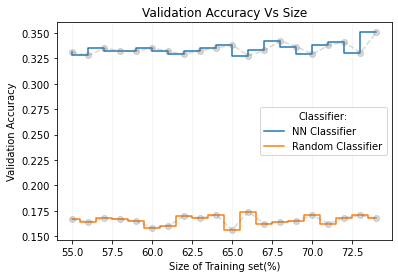

In [ ]:
# increase percentage of validation set

print("{}  {}".format("Training data","Validation accuracy(NN, RandomClassifier)"))
x,y1,y2 = [],[],[]
for i in (np.arange(55,75,1)):
  x.append(i)
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred1 = NN(traindata, trainlabel, valdata)
  valpred2 = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy1 = Accuracy(vallabel, valpred1)
  y1.append(valAccuracy1)
  valAccuracy2 = Accuracy(vallabel, valpred2)
  y2.append(valAccuracy2)

  print("    {}%        {}".format(i,(valAccuracy1,valAccuracy2)))
plt.step(x, y1, label='NN Classifier')
plt.plot(x, y1, 'o--', color='grey', alpha=0.3)

plt.step(x, y2 , where='mid', label='Random Classifier')
plt.plot(x, y2 , 'o--', color='grey', alpha=0.3)


plt.grid(axis='x', color='0.95')
plt.legend(title='Classifier:')
plt.xlabel("Size of Training set(%)")
plt.ylabel("Validation Accuracy")
plt.title('Validation Accuracy Vs Size')
plt.show()

Training data  Validation accuracy(NN, RandomClassifier)
    75%        (0.3437652811735941, 0.1508557457212714)
    76%        (0.3416873449131514, 0.1707196029776675)
    77%        (0.34370912895631706, 0.16453047345017002)
    78%        (0.34623833058758924, 0.17215815485996705)
    79%        (0.35522388059701493, 0.15791044776119403)
    80%        (0.3461422996097268, 0.15971179825878115)
    81%        (0.3337543416482476, 0.16577202399747396)
    82%        (0.35360054347826086, 0.16168478260869565)
    83%        (0.33263157894736844, 0.17192982456140352)
    84%        (0.34375, 0.1680640243902439)
    85%        (0.3448692152917505, 0.17706237424547283)
    86%        (0.3383838383838384, 0.16835016835016836)
    87%        (0.3475836431226766, 0.17472118959107807)
    88%        (0.338659793814433, 0.1515463917525773)
    89%        (0.34813210611802925, 0.1580942068218733)
    90%        (0.3419626730885009, 0.17760385310054183)


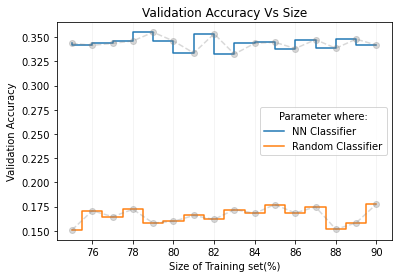

In [ ]:
# decrease percentage of validation set
x,y1_,y2_ = [],[],[]
print("{}  {}".format("Training data","Validation accuracy(NN, RandomClassifier)"))
for i in (np.arange(75,91,1)):
  x.append(i)
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred1 = NN(traindata, trainlabel, valdata)
  valpred2 = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy1 = Accuracy(vallabel, valpred1)
  y1_.append(valAccuracy1)
  valAccuracy2 = Accuracy(vallabel, valpred2)
  y2_.append(valAccuracy2)
  print("    {}%        {}".format(i,(valAccuracy1,valAccuracy2)))

plt.step(x, y1_, label='NN Classifier')
plt.plot(x, y1_, 'o--', color='grey', alpha=0.3)

plt.step(x, y2_ , where='mid', label='Random Classifier')
plt.plot(x, y2_ , 'o--', color='grey', alpha=0.3)


plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.xlabel("Size of Training set(%)")
plt.ylabel("Validation Accuracy")
plt.title('Validation Accuracy Vs Size')
plt.show()



In [ ]:
# Check for Extrem values (99.9%)
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99.9/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is  ', testAccuracy)


Validation accuracy of nearest neighbour is  0.4
Test accuracy is  0.34917953667953666


In [ ]:
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of random classifier is ", valAccuracy)
testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy of random classifier is ', testAccuracy)

Validation accuracy of random classifier is  0.13333333333333333
Test accuracy is  0.16891891891891891


As we see above, percentage of validation set affects the accuracy but we can't make any statement like if we increase percentage, accuracy will also increase as we see for 99.9%. Same thing valid if we decrease the percentage.

***2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?***

In [ ]:

x,t1,t2 = [],[],[]
for i in (np.arange(75,91,1)):
  x.append(i)
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)

  testpred1 = NN(alltraindata, alltrainlabel, testdata)
  testAccuracy1 = Accuracy(testlabel, testpred1)
  t1.append(testAccuracy1)

  testpred2 = RandomClassifier(alltraindata, alltrainlabel, testdata)
  testAccuracy2 = Accuracy(testlabel, testpred2)
  t2.append(testAccuracy2)



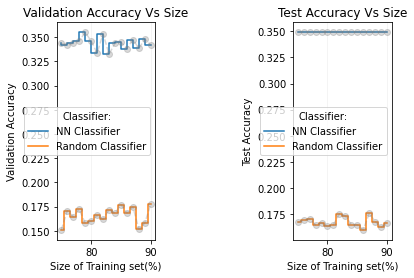

In [ ]:
plt.subplot(1,3,1)
plt.step(x, y1_, label='NN Classifier')
plt.plot(x, y1_, 'o--', color='grey', alpha=0.3)

plt.step(x, y2_ , where='mid', label='Random Classifier')
plt.plot(x, y2_ , 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Classifier:')
plt.xlabel("Size of Training set(%)")
plt.ylabel("Validation Accuracy")
plt.title('Validation Accuracy Vs Size')

plt.subplot(1,3,3)
plt.step(x, t1, label='NN Classifier')
plt.plot(x, t1, 'o--', color='grey', alpha=0.3)

plt.step(x, t2 , where='mid', label='Random Classifier')
plt.plot(x, t2 , 'o--', color='grey', alpha=0.3)


plt.grid(axis='x', color='0.95')
plt.legend(title='Classifier:')
plt.xlabel("Size of Training set(%)")
plt.ylabel("Test Accuracy")
plt.title('Test Accuracy Vs Size')
plt.show()

if size of the train data is sufficiently large, then there are less chance that model overfits the data. Then validation accuracy and test accuracy  wil fall under same range (if you don't overfit validation data).


Also, when size of training data is small, if we can able to avoid overfitting on validation data, It can give rough idea about how well our model going to perform on test data.

---



 ***3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?***

I think percetage of validation should be between ***20 to 30% of training data.***

---



## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


---



***1. Does averaging the validation accuracy across multiple splits give more consistent results?***

In [ ]:
x = np.arange(55,91,5)
y = []
for i in x:
  avg_acc = AverageAccuracy(alltraindata, alltrainlabel, i/100, 10, classifier=NN)
  y.append(avg_acc)

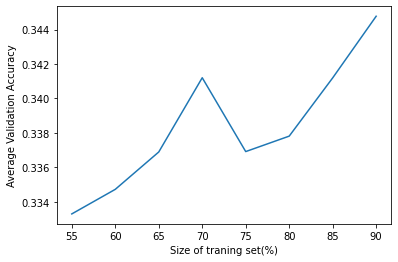

In [ ]:
plt.plot(x,y)
plt.xlabel("Size of traning set(%)")
plt.ylabel("Average Validation Accuracy")
plt.show()

*Average Validation Accuracy* is **not consistent** as it veries between **0.33 to 0.34.** But we can say it is sort of consistent as **variation 
is whitin 0.1.**


---




**2. Does it give more accurate estimate of test accuracy?**

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

x = np.arange(55,91,5)
y = []
for i in x:
  avg_acc = AverageAccuracy(alltraindata, alltrainlabel, i/100, 10, classifier=NN)
  y.append(avg_acc)

In [ ]:
x,t = [],[]
for i in (np.arange(55,91,5)):
  x.append(i)
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  testpred = NN(alltraindata, alltrainlabel, testdata)
  testAccuracy = Accuracy(testlabel, testpred)
  t.append(testAccuracy)

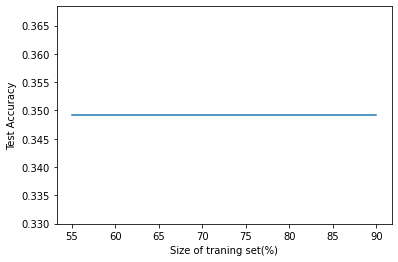

In [ ]:
plt.plot(x,t)
plt.xlabel("Size of traning set(%)")
plt.ylabel("Test Accuracy")
plt.show()

As we show in previous question Average Validation Accuracy varis between 0.33 to 0.34 but we got consistant Test Accuracy 0.35 for different size of train data.

That's why we can say that Average Validation Accuracy gives **accurate estimate** of *Test Accuracy*.


---




***3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?***

In [ ]:
# Let's iterate it over 10,20,30,...,100 times
# Here I have taken 25% of training data as Validation data.
x = np.arange(10,51,10)
y =[]
for i in x:
  avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN)
  y.append(avg_acc)

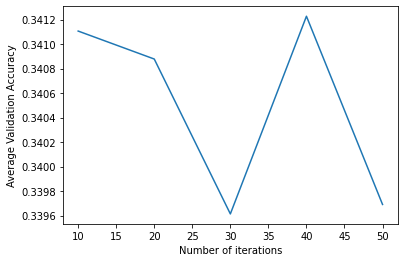

In [ ]:
plt.plot(x,y)
plt.xlabel("Number of iterations")
plt.ylabel("Average Validation Accuracy")
plt.show()

We saw in previous question that our Test Accuracy is around 0.35. So here we **get good approximation at 40 iterations** as **0.3412.** 


Our estimation is roughly around 0.34, Which is not much far than 0.35.

However, there is not a linear relationship, we **can't make statement** like for higher itretion we will get a better estimate.

---



4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [ ]:
# Let's check for  very small validation dataset
# suppose we take 5% of train data as Validation data
x = np.arange(10,61,10)
y =[]
for i in x:
  avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 95/100, i, classifier=NN)
  y.append(avg_acc)


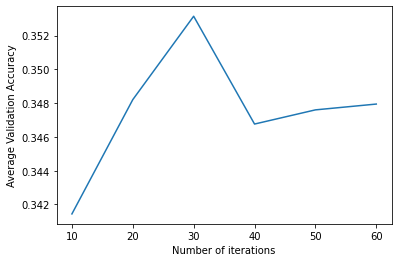

In [ ]:
plt.plot(x,y)
plt.xlabel("Number of iterations")
plt.ylabel("Average Validation Accuracy")
plt.show()

Here we can see however our Validation data is very small, we get Average Validation Accuracy between **0.34 and 0.35**.

For **30 iteration** we get Average Validation Accuracy around 0.35.

It shows with increasing the iterations we can deal with a very small train dataset or validation dataset.

---

